# executorlib

https://github.com/BAMresearch/NFDI4IngScientificWorkflowRequirements

## Define workflow with executorlib

In [1]:
import os

In [2]:
from workflow import generate_mesh, convert_to_xdmf, poisson, plot_over_line, substitute_macros, compile_paper 

In [3]:
from executorlib import SingleNodeExecutor, get_item_from_future

In [4]:
domain_size = 2.0

In [5]:
source_directory = os.path.abspath(os.path.join(os.curdir, "source"))

In [6]:
workflow_json_filename = "executorlib_nfdi.json"

In [7]:
with SingleNodeExecutor(export_workflow_filename=workflow_json_filename) as exe:
    gmsh_output_file = exe.submit(
        generate_mesh,
        domain_size=domain_size,
        source_directory=source_directory,
    )
    meshio_output_dict = exe.submit(
        convert_to_xdmf,
        gmsh_output_file=gmsh_output_file,
    )
    poisson_dict = exe.submit(
        poisson,
        meshio_output_xdmf=get_item_from_future(meshio_output_dict, key="xdmf_file"), 
        meshio_output_h5=get_item_from_future(meshio_output_dict, key="h5_file"),
        source_directory=source_directory,
    )
    pvbatch_output_file = exe.submit(
        plot_over_line,
        poisson_output_pvd_file=get_item_from_future(poisson_dict, key="pvd_file"), 
        poisson_output_vtu_file=get_item_from_future(poisson_dict, key="vtu_file"),
        source_directory=source_directory,
    )
    macros_tex_file = exe.submit(
        substitute_macros,
        pvbatch_output_file=pvbatch_output_file, 
        ndofs=get_item_from_future(poisson_dict, key="numdofs"), 
        domain_size=domain_size,
        source_directory=source_directory,
    )
    paper_output = exe.submit(
        compile_paper,
        macros_tex=macros_tex_file, 
        plot_file=pvbatch_output_file,
        source_directory=source_directory,
    )

In [8]:
!cat {workflow_json_filename}

{
    "version": "0.1.0",
    "nodes": [
        {
            "id": 0,
            "type": "function",
            "value": "workflow.generate_mesh"
        },
        {
            "id": 1,
            "type": "function",
            "value": "workflow.convert_to_xdmf"
        },
        {
            "id": 2,
            "type": "function",
            "value": "workflow.poisson"
        },
        {
            "id": 3,
            "type": "function",
            "value": "workflow.plot_over_line"
        },
        {
            "id": 4,
            "type": "function",
            "value": "workflow.substitute_macros"
        },
        {
            "id": 5,
            "type": "function",
            "value": "workflow.compile_paper"
        },
        {
            "id": 6,
            "type": "input",
            "value": 2.0,
            "name": "domain_size"
        },
        {
            "id": 7,
            "type": "input",
            "value": "/home/jan/notebooks/2026/

## Load Workflow with aiida

In [9]:
from aiida import load_profile

load_profile()

Profile<uuid='c08748df7ab74ec08c14e5f16cebc987' name='pwd'>

In [10]:
from python_workflow_definition.aiida import load_workflow_json

In [11]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

In [12]:
wg.run()

01/16/2026 08:09:53 AM <39943> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1584|WorkGraphEngine|continue_workgraph]: tasks ready to run: generate_mesh
01/16/2026 08:09:56 AM <39943> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1584|WorkGraphEngine|update_task_state]: Task: generate_mesh, type: PYFUNCTION, finished.
01/16/2026 08:09:56 AM <39943> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1584|WorkGraphEngine|continue_workgraph]: tasks ready to run: convert_to_xdmf
01/16/2026 08:10:00 AM <39943> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1584|WorkGraphEngine|update_task_state]: Task: convert_to_xdmf, type: PYFUNCTION, finished.
01/16/2026 08:10:00 AM <39943> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [1584|WorkGraphEngine|continue_workgraph]: tasks ready to run: poisson
/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: 

{}

## Load Workflow with jobflow

In [13]:
from python_workflow_definition.jobflow import load_workflow_json

In [14]:
from jobflow.managers.local import run_locally

In [15]:
flow = load_workflow_json(file_name=workflow_json_filename)

In [16]:
result = run_locally(flow)
result

2026-01-16 08:10:22,433 INFO Started executing jobs locally
2026-01-16 08:10:22,747 INFO Starting job - generate_mesh (fca356ed-0f12-49aa-90c5-3161982fb757)
2026-01-16 08:10:24,797 INFO Finished job - generate_mesh (fca356ed-0f12-49aa-90c5-3161982fb757)
2026-01-16 08:10:24,797 INFO Starting job - convert_to_xdmf (2be5b5a6-4ba9-4962-b09c-c7565e4655a8)
2026-01-16 08:10:27,186 INFO Finished job - convert_to_xdmf (2be5b5a6-4ba9-4962-b09c-c7565e4655a8)
2026-01-16 08:10:27,186 INFO Starting job - poisson (e539fd0a-4e53-42b4-b79d-9d07a2f602d7)


/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


2026-01-16 08:10:30,319 INFO Finished job - poisson (e539fd0a-4e53-42b4-b79d-9d07a2f602d7)
2026-01-16 08:10:30,320 INFO Starting job - plot_over_line (e71edb93-5784-4a14-9cb8-29180644c4e1)
2026-01-16 08:10:33,201 INFO Finished job - plot_over_line (e71edb93-5784-4a14-9cb8-29180644c4e1)
2026-01-16 08:10:33,202 INFO Starting job - substitute_macros (ca231d17-16ce-409c-a4cc-9a3988b7524a)
2026-01-16 08:10:35,251 INFO Finished job - substitute_macros (ca231d17-16ce-409c-a4cc-9a3988b7524a)
2026-01-16 08:10:35,252 INFO Starting job - compile_paper (43798414-e406-411e-9daa-bf1bf3d20c25)
2026-01-16 08:10:39,264 INFO Finished job - compile_paper (43798414-e406-411e-9daa-bf1bf3d20c25)
2026-01-16 08:10:39,265 INFO Finished executing jobs locally


{'fca356ed-0f12-49aa-90c5-3161982fb757': {1: Response(output='/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi/preprocessing/square.msh', detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi'))},
 '2be5b5a6-4ba9-4962-b09c-c7565e4655a8': {1: Response(output={'xdmf_file': '/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi/preprocessing/square.xdmf', 'h5_file': '/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi/preprocessing/square.h5'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi'))},
 'e539fd0a-4e53-42b4-b79d-9d07a2f602d7': {1: Response(output={'numdofs': 357, 'pvd_file': '/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi/processing/poisson.pvd', 'vtu_file': '/home/jan/notebooks/2026/2026-01-16-executorlib

# Load Workflow with pyiron_base

In [17]:
from python_workflow_definition.pyiron_base import load_workflow_json

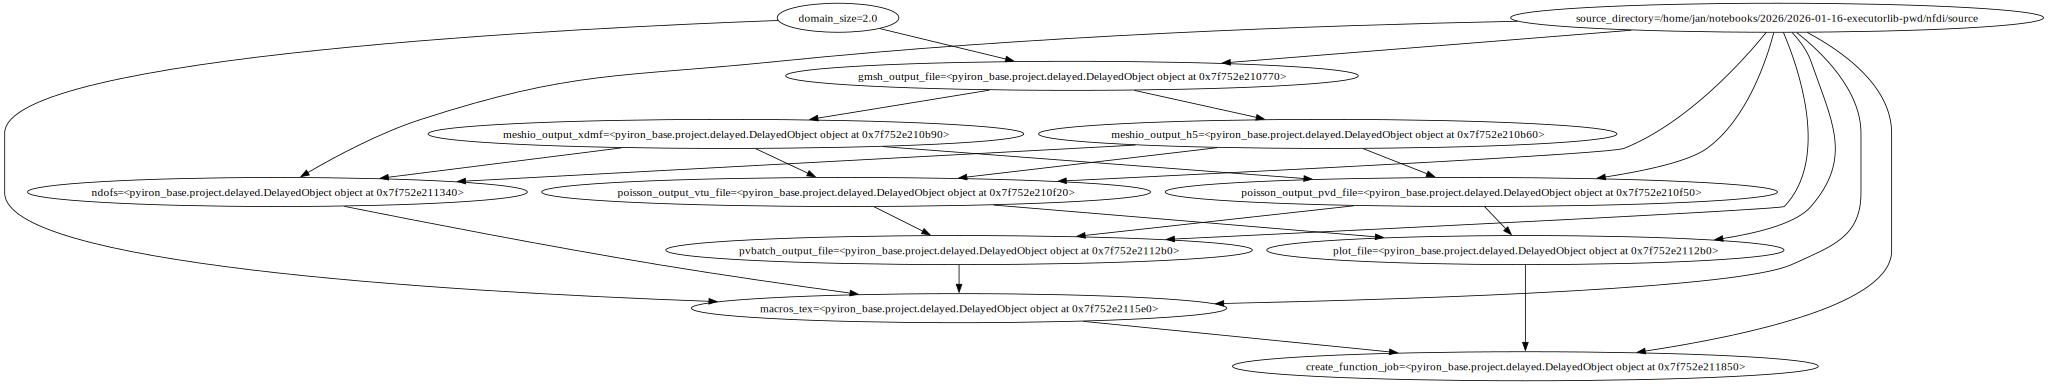

In [18]:
delayed_object_lst = load_workflow_json(file_name=workflow_json_filename)
delayed_object_lst[-1].draw()

In [19]:
delayed_object_lst[-1].pull()

The job generate_mesh_48a36c5747cacb5a404050510014e47e was saved and received the ID: 34
The job convert_to_xdmf_eb9b45572042c1ef8c618184cde64b0d was saved and received the ID: 35
The job poisson_2fd5008b2250fed255cc4f58e009fe7e was saved and received the ID: 36


/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


The job plot_over_line_e59dd6066e3aaeb378917024209e71cf was saved and received the ID: 37
The job substitute_macros_317cac7b98bf8b6278cdf40a45350ccb was saved and received the ID: 38
The job compile_paper_32a7807be3644bd018cad61f46ebfb35 was saved and received the ID: 39


'/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi/postprocessing/paper.pdf'

## Load Workflow with pyiron_workflow

In [20]:
from python_workflow_definition.pyiron_workflow import load_workflow_json

In [21]:
wf = load_workflow_json(file_name=workflow_json_filename)

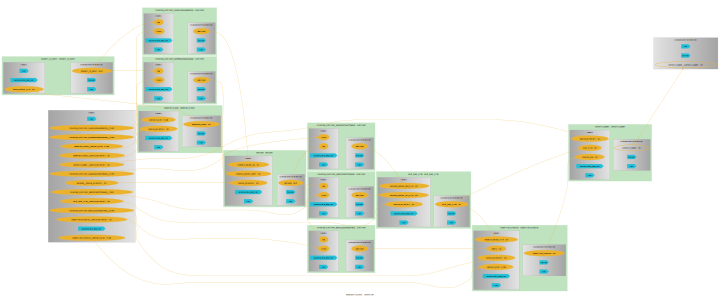

In [22]:
wf.draw(size=(10,10))

In [23]:
wf.run()

/home/jan/miniforge3/envs/processing/lib/python3.9/site-packages/ufl/__init__.py:250: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


{'compile_paper__compile_paper': '/home/jan/notebooks/2026/2026-01-16-executorlib-pwd/nfdi/postprocessing/paper.pdf'}